#                                   House price prediction

# selecting the most important features (feature selection)

the correlation map shows a positive correrlation between the price of houses and :
- sqft_living(0.7)
- the sqft_above(0.61)
- sqft_living15(0.59)
- bedrooms(0.31)
- bathrooms(0.53)
- floors(0.26)
- yr_built(0.054)
- zipcode(-0.053)
- lat(0.31)
- long(-0.022)
- grade(0.67)

At the same time the sqft_living is highly positivetly correlated with :

- bathrooms
- sqft_above
- sqft_living15
- grade
As result we will remove thoes features, and we wil choose the "sqft_living as feature for the linear regression


In [42]:
A1=A.filter(['price','bedrooms','sqft_living','sqft_lot','sqft_basement','floors','yr_built','yr_renovated','zipcode','lat','long',])
A1

,price,bedrooms,sqft_living,sqft_lot,sqft_basement,floors,yr_built,zipcode,lat,long
0,221900.0,3,1180,5650,0,1.0,1955,98178,47.5112,122.257
1,538000.0,3,2570,7242,400,2.0,1951,98125,47.7210,122.319
2,180000.0,2,770,10000,0,1.0,1933,98028,47.7379,122.233
3,604000.0,4,1960,5000,910,1.0,1965,98136,47.5208,122.393
4,510000.0,3,1680,8080,0,1.0,1987,98074,47.6168,122.045
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,1530,1131,0,3.0,2009,98103,47.6993,122.346
21609,400000.0,4,2310,5813,0,2.0,2014,98146,47.5107,122.362
21610,402101.0,2,1020,1350,0,2.0,2009,98144,47.5944,122.299
21611,400000.0,3,1600,2388,0,2.0,2004,98027,47.5345,122.069


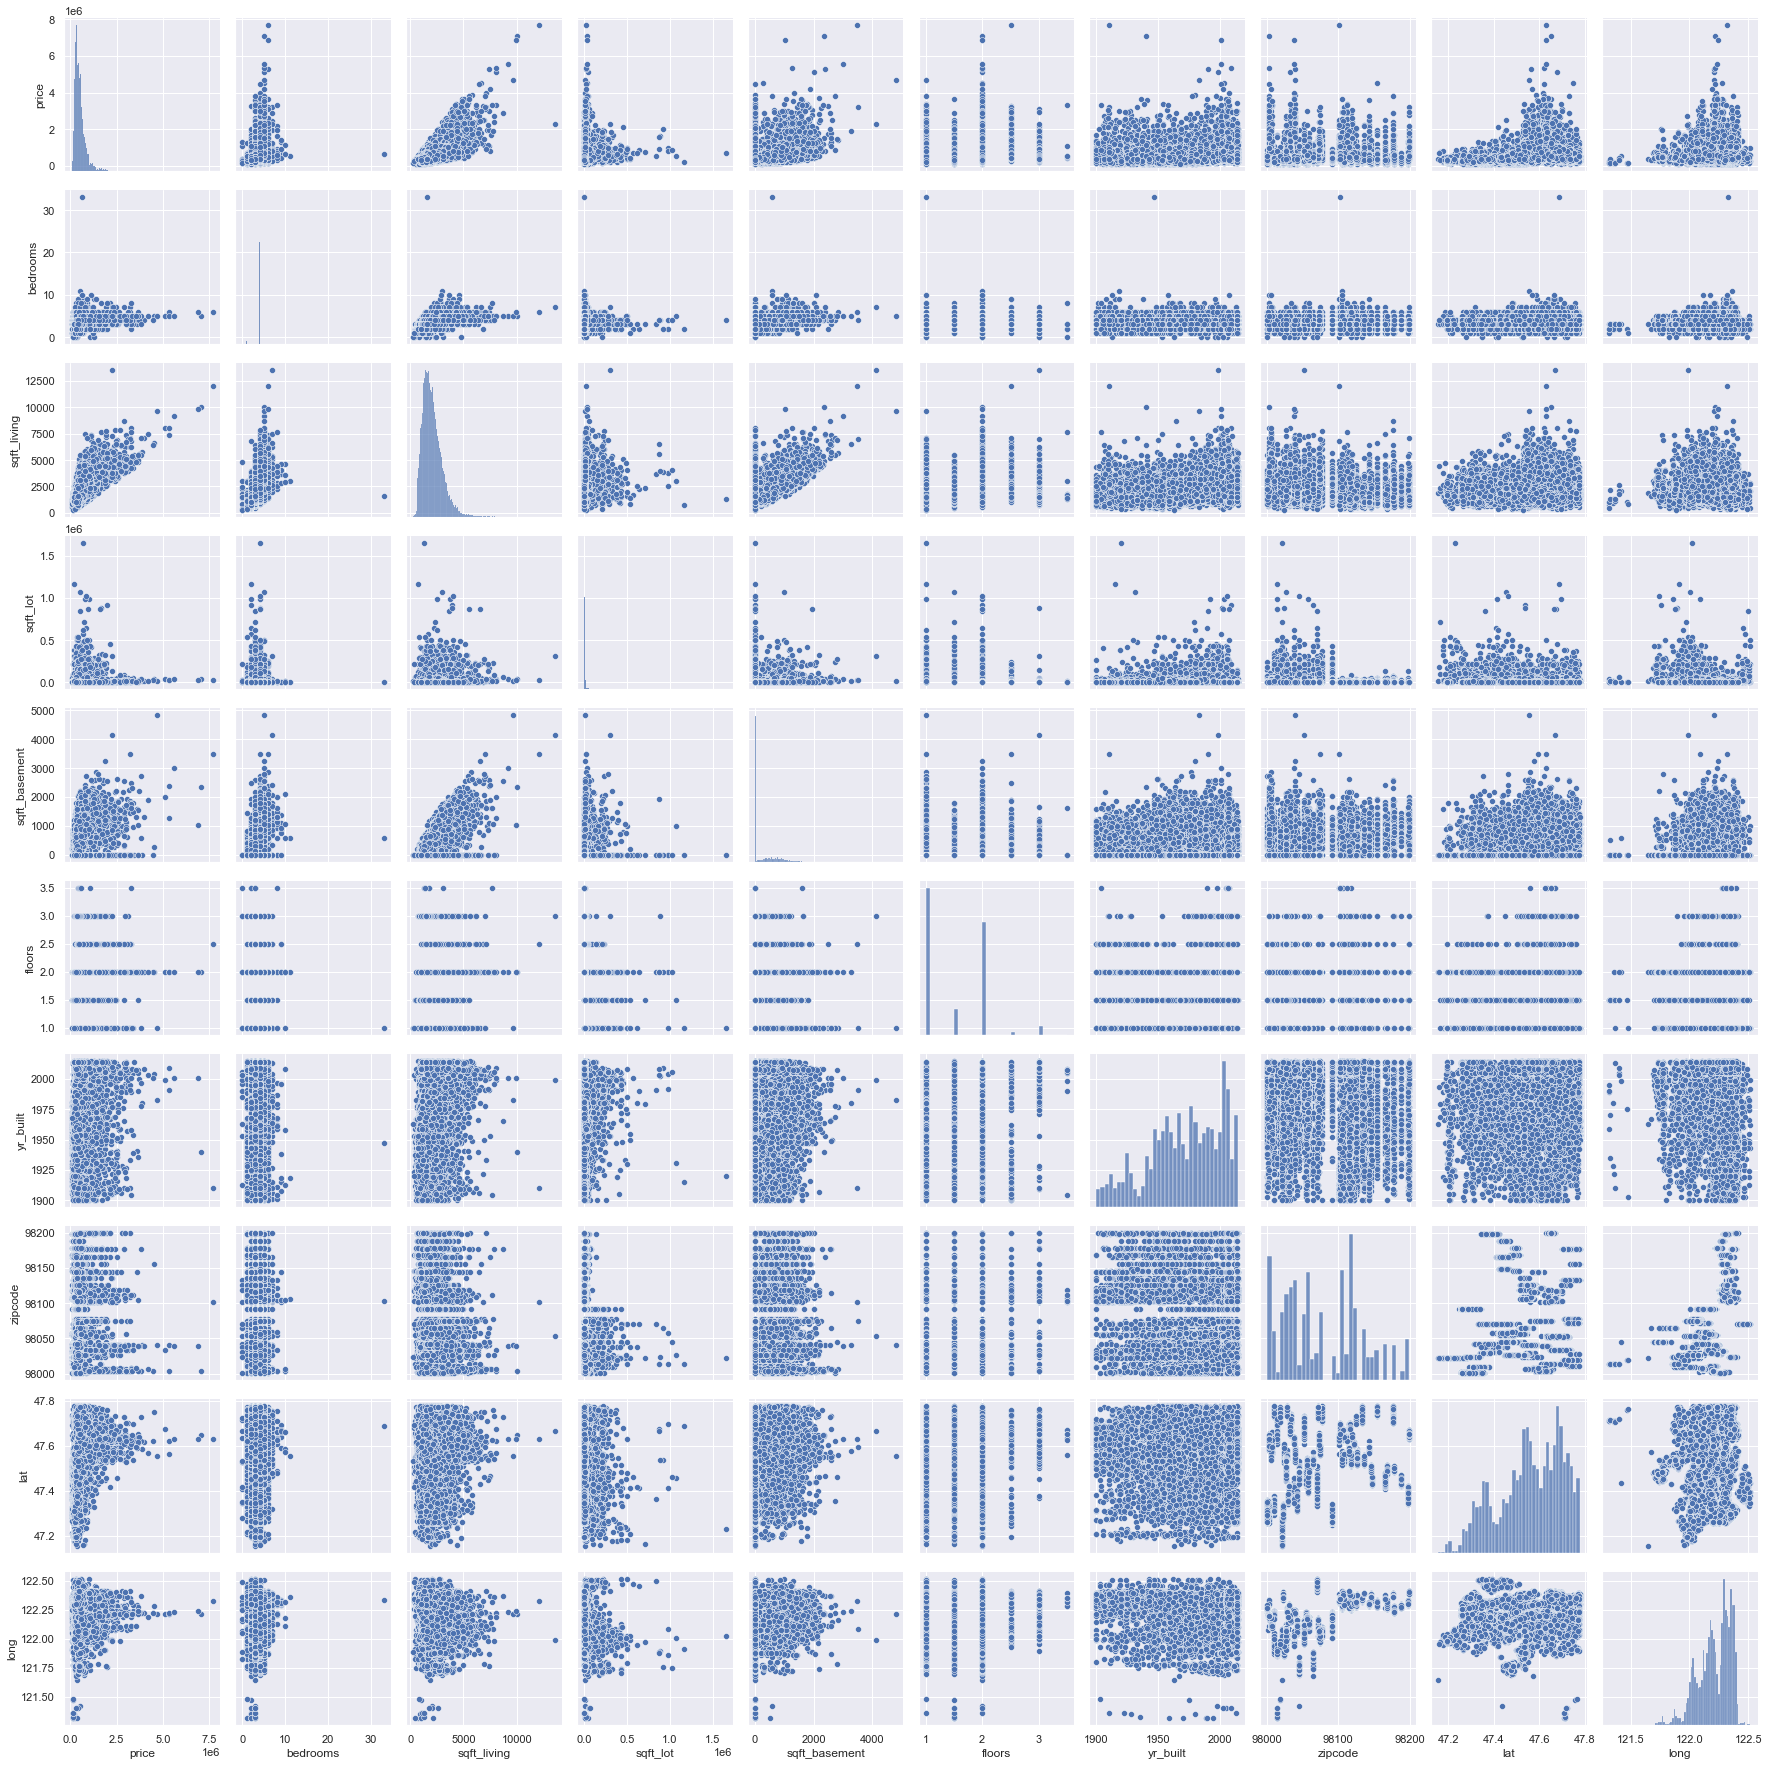

In [43]:
sns.pairplot(A1)

#  For the linear regression we will choose as feature the "sqft_living"

In [44]:
A1[["price", "sqft_living"]].groupby(["price"], as_index=True).mean()


,sqft_living
price,
75000.0,670.0
78000.0,780.0
80000.0,430.0
81000.0,730.0
82000.0,860.0
...,...
5350000.0,8000.0
5570000.0,9200.0
6885000.0,9890.0


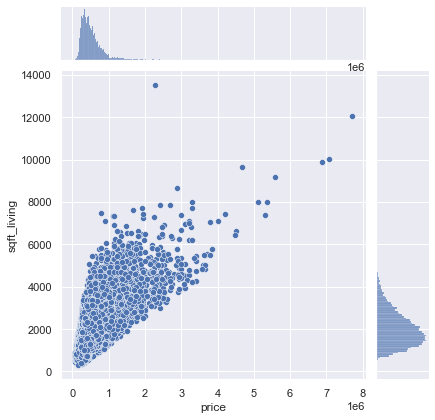

In [45]:
sns.jointplot(x='price',y='sqft_living',data=A1)

In [48]:
#scaling
scaler=StandardScaler()
A1['price']=scaler.fit_transform(A1[['price']].values)
A1['sqft_living']=scaler.fit_transform(A1[['sqft_living']].values)
A1['zipcode']=scaler.fit_transform(A1[['zipcode']].values)
A1['long']=scaler.fit_transform(A1[['long']].values)
A1['bedrooms']=scaler.fit_transform(A1[['bedrooms']].values)
A1['floors']=scaler.fit_transform(A1[['floors']].values)
A1['yr_built']=scaler.fit_transform(A1[['yr_built']].values)
A1['lat']=scaler.fit_transform(A1[['lat']].values)
A1['sqft_lot']=scaler.fit_transform(A1[['sqft_lot']].values)
A1['sqft_basement']=scaler.fit_transform(A1[['sqft_basement']].values)

# linear regression.

In [49]:
#split training/test

y=A1['price'].values
x=A1[['sqft_living']]
y=A1['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)
x_train,x_test,y_train,y_test


(       sqft_living
 7755      0.130768
 14482    -1.077829
 7444     -0.424533
 4989      0.381199
 8741      0.577187
 ...            ...
 500       1.197819
 12077    -0.163215
 15277     1.252260
 4517     -0.163215
 5925     -1.045165
 
 [15129 rows x 1 columns],
        sqft_living
 20999    -0.032556
 20641     0.326757
 7065      0.326757
 21068     0.542345
 6715      0.381199
 ...            ...
 10316    -0.598746
 11343     0.108992
 4940     -0.217656
 3898     -0.480063
 6623     -0.217656
 
 [6484 rows x 1 columns],
 array([-0.40882728, -0.31349027, -0.40882728, ...,  0.63307006,
        -0.49054472, -0.24539241]),
 array([-0.50825017, -0.42258305, -0.54502301, ..., -0.74523074,
        -0.24539241,  0.02699906]))

In [50]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
predicted

array([-0.02203281,  0.22962045,  0.22962045, ..., -0.15167237,
       -0.33545551, -0.15167237])

In [51]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 0.5033696730924468
R squared 0.5008750980131821


A MSE of 0.503 is not a good result and according to the R squared  only 0.5008 of the output variable can be explained by the model

In [22]:
model.coef_


array([0.70037364])

In [23]:
model.intercept_

0.000768298054265683

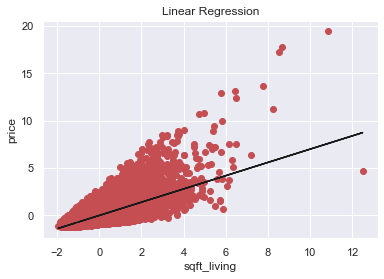

In [24]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel('sqft_living')
plt.plot(x,model.predict(x),color="k")
plt.show()

### Multi linear regression


In [63]:
#splitting data
x=A1[['sqft_living','zipcode','long','bedrooms','floors','yr_built','lat','sqft_lot','sqft_basement']] 
y=A1["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40) 


In [65]:

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.3575749262450402
R squared 0.6169036080324877


Compared to the result of the linear regression we can obtain a better MSE and R squared when we use the multi linear regression when 61.69% of the output can be explained by the Model.

In [56]:
print(model.coef_)
print(model.intercept_)

[ 0.85861555 -0.10267788  0.12647045 -0.16479602  0.05274123 -0.1738476
  0.24742456 -0.00477858 -0.04743462]
0.0021018203901395816


# polynomial regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures
# splitting data
x= A1[['sqft_living','zipcode','long','bedrooms','floors','yr_built','lat','sqft_lot','sqft_basement']]
y= A1["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)  #splitting data

lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))



MSE:  0.2748297135023282
R squared:  0.7055546574424626


Using the polynomial regression can be much better because the MSE is reduced to 27% and 70.55% of variable can be explained by the model

In [62]:
print(model.coef_)
print(model.intercept_)

[ 0.85861555 -0.10267788  0.12647045 -0.16479602  0.05274123 -0.1738476
  0.24742456 -0.00477858 -0.04743462]
0.0021018203901395816
